In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
#load data
df = pd.read_csv(r'C:\Users\piyus\DiabetesPrediction\data\diabetes.csv')


In [63]:
#inspect data
print(df.head())        # Show first 5 rows
print(df.columns)       # Show column names
print(df.shape)         # Show (rows, columns)
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  

In [64]:
#initiate variables
w_init=np.zeros(df.shape[1]-1)
b_init=0
m=df.shape[0]
num_iters=100000
alpha=0.001
ratio=0.8
X = df.drop('Outcome', axis=1)  # All columns except the target
y = df['Outcome']              # Only the target column
X = X.to_numpy()
y = y.to_numpy()



In [65]:
def train_test_split(x,y,ratio,m):
    #shuffle data
    indices=np.arange(m)
    np.random.seed(42)
    np.random.shuffle(indices)

    X_shuffled= X[indices]
    y_shuffled =y[indices]

    #split data
    train_size= int(ratio*m)
    X_train,X_test=X_shuffled[:train_size] , X_shuffled[train_size:]
    y_train,y_test=y_shuffled[:train_size] , y_shuffled[train_size:]

    return X_train, X_test, y_train, y_test

In [66]:
def scale(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_scaled = (X - X_mean) / X_std
    return X_scaled



In [67]:
def calc(x, w, b):
    pred = np.dot(x, w) + b
    z = 1 / (1 + np.exp(-pred))  # sigmoid probabilities
    return z  # ✅ return probabilities (not hard classes)


In [68]:
def predict(X, w, b, threshold=0.5):
    probs = calc(X,w,b)
    return np.where(probs >= threshold, 1, 0)

In [69]:

def compute_cost(y, y_hat):
    m = y.shape[0]
    epsilon = 1e-15  # To avoid log(0)
    cost = - (1/m) * np.sum(
        y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon)
    )
    return cost

In [70]:
def gradientdescent(X,w_init,b_init,y,num_iters,alpha):
    w=w_init
    b=b_init
    j_hist=np.zeros(num_iters)
    for i in range (num_iters):
        y_hat=calc(X,w,b)
        err=y_hat-y
        dj_dw=(1/m)*np.dot(X.T,err)
        dj_db=(1/m)*np.sum(err)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        cost=compute_cost(y,y_hat)
        j_hist[i]=cost
        if(i%100==0):
            print(f"iteration: {i}, j: {cost}")
            print(w,b)

            
    return w,b,j_hist

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,ratio,m)

In [72]:
X_train=scale(X_train)

In [53]:
w,b,j=gradientdescent(X_train,w_init,b_init,y_train,num_iters,alpha)

iteration: 0, j: 0.6931471805599434
[8.45522825e-05 1.80272535e-04 3.13917094e-05 2.99547384e-05
 4.71831372e-05 1.03215705e-04 6.91184138e-05 8.85427994e-05] -0.00012630208333333333
iteration: 100, j: 0.6831002511659948
[0.00838957 0.01793699 0.00303085 0.00292331 0.00461839 0.010237
 0.00685241 0.00875864] -0.012629881676944066
iteration: 200, j: 0.6736890707318796
[0.01640453 0.035171   0.00576311 0.00562178 0.00890743 0.02000951
 0.01338801 0.01707341] -0.024886227905270047
iteration: 300, j: 0.6648675629136198
[0.02414039 0.05190171 0.00824216 0.00813612 0.0129278  0.0294366
 0.01968623 0.02504684] -0.036900749899335984
iteration: 400, j: 0.656592501418247
[0.03160799 0.06814841 0.0104818  0.01047682 0.01669268 0.03853395
 0.02575728 0.03269274] -0.04867901453402548
iteration: 500, j: 0.6488235300672993
[0.03881796 0.0839301  0.0124955  0.012654   0.02021495 0.04731703
 0.03161126 0.04002466] -0.06022668443754757
iteration: 600, j: 0.6415231242594446
[0.04578071 0.09926538 0.01429

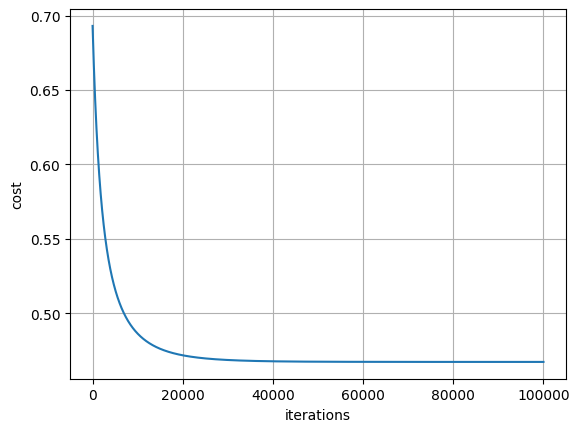

In [54]:
plt.plot(np.arange(num_iters),j)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.grid(True)
plt.show()

In [55]:
y_pred = predict(X_test, w, b)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.3766


In [59]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(y_test, y_pred)
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")


TP: 58, TN: 0, FP: 96, FN: 0


In [60]:
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Precision: 0.3766
Recall: 1.0000
F1 Score: 0.5472
